# Self-Organizing Maps

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=0.1, learning_rate= 0.5)
som.random_weights_init(X)
som.train_random(data= X, num_iteration= 100)

## Visualizing the results

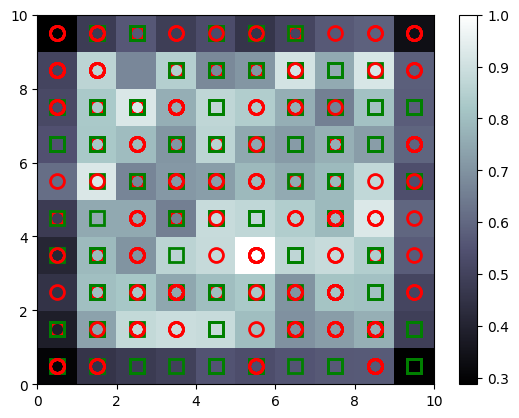

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers= ['o','s']
colors= ['r','g']
for i, x in enumerate(X):
    w= som.winner(x)
    plot(w[0]+0.5, 
         w[1]+0.5, 
         markers[y[i]], 
         markeredgecolor= colors[y[i]], 
         markerfacecolor= 'None', 
         markersize= 10,
         markeredgewidth= 2)
show()

## Finding the frauds

In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,6)], mappings[(5,8)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [11]:
print(frauds)

[[1.5578722e+07 1.0000000e+00 1.9420000e+01 1.5000000e+00 1.0000000e+00
  1.3000000e+01 4.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 2.1000000e+01]
 [1.5647898e+07 1.0000000e+00 2.4580000e+01 1.2500000e+01 2.0000000e+00
  9.0000000e+00 4.0000000e+00 8.7500000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.6000000e+02 1.0000000e+00]
 [1.5587038e+07 1.0000000e+00 1.9330000e+01 9.5000000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 6.0000000e+01 4.0100000e+02]
 [1.5588854e+07 1.0000000e+00 2.6000000e+01 1.0000000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 1.7500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5609823e+07 1.0000000e+00 2.8750000e+01 1.1650000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 5.0000000e-01 1.0000000e+00 0.